

> **Rayhan Mahmud Ansari**                                         
 **Reg No: 2019331566**





**Task of DIP Lab Final 2024(SEC 2019-20):**

Upload the image(DIP_Lab_task_01.png) from drive with extracting details like: image dimension, frequency distribution of intensities, range. [5]

Convert the RGB image(DIP_Lab_task_02.jpg) to a gray scale image and compare a sub-region of the image by intensity values(5*5 dimension would be enough for comparison). [10]

Apply Image(DIP_Lab_task_03.png) smoothing with appropriate kernel applied. Identify the noise(if any) before processing. [35]

Implement an appropriate technique to reduce the brightness of the provided image (DIP_Lab_task_04.jpg) effectively. [20]

Solve the segmentation problem for the given image: 'DIP_Lab_task_05.jpg' [30]


**Task: 1**


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Image Dimensions: 225x225, Channels: 3


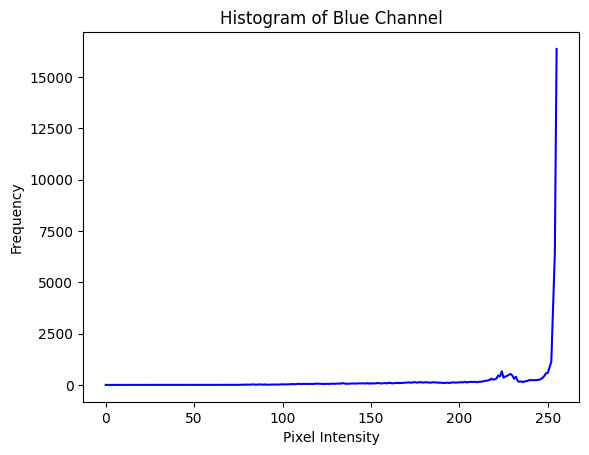

Minimum Intensity: 5
Maximum Intensity: 255
Intensity Range (Max - Min + 1): 251


In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = '/content/drive/MyDrive/Rayhan/DIP_LAB_FINAL/DIP_Lab_task_01.png'
input_image = cv2.imread(image_path)

# Get image dimensions
height, width, num_channels = input_image.shape
print(f"Image Dimensions: {height}x{width}, Channels: {num_channels}")

# Calculate and plot the histogram
blue_channel_hist = cv2.calcHist([input_image], [0], None, [256], [0, 256])
plt.plot(blue_channel_hist, color='blue')
plt.title('Histogram of Blue Channel')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Display intensity details
min_intensity = input_image.min()
max_intensity = input_image.max()
intensity_range = max_intensity - min_intensity + 1

print("Minimum Intensity:", min_intensity)
print("Maximum Intensity:", max_intensity)
print("Intensity Range (Max - Min + 1):", intensity_range)


**Task:2**

Text(0.5, 1.0, 'Grayscale Image')

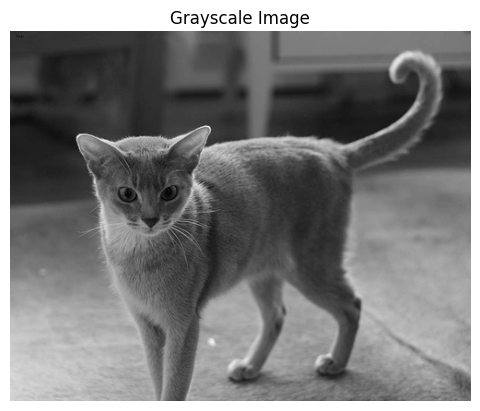

In [20]:
def convert_to_grayscale(image):
    height, width, num_channels = image.shape

    grayscale_image = np.zeros((height, width), dtype=np.uint8)
    for row in range(height):
        for col in range(width):
            red, green, blue = image[row, col]
            grayscale_image[row, col] = red * 0.29 + green * 0.58 + blue * 0.11

    return grayscale_image

# Read the image from the file
image_path = '/content/drive/MyDrive/Rayhan/DIP_LAB_FINAL/DIP_Lab_task_02.jpg'
color_image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = convert_to_grayscale(color_image)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')

**Task:3**

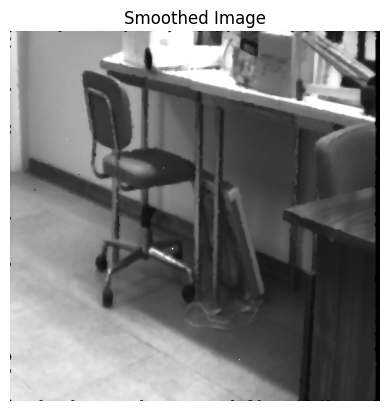

In [21]:
# Image Smoothing Function
def apply_median_filter(image, kernel):
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image with zeros
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Initialize the output image
    image_height, image_width = image.shape
    smoothed_image = np.zeros((image_height, image_width))

    # Perform convolution with median filtering
    for row in range(image_height):
        for col in range(image_width):
            region_of_interest = padded_image[row:row + kernel_height, col:col + kernel_width]
            smoothed_image[row, col] = np.median(region_of_interest)

    return smoothed_image

# Load and preprocess the image
image_path = '/content/drive/MyDrive/Rayhan/DIP_LAB_FINAL/DIP_Lab_task_03.bmp'
input_image = cv2.imread(image_path)
grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Define the kernel
kernel_size = (5, 5)
smoothing_kernel = np.ones(kernel_size, dtype=np.uint8) / 9

# Apply the smoothing filter
smoothed_image = apply_median_filter(grayscale_image, smoothing_kernel)

# Display the smoothed image
plt.imshow(smoothed_image, cmap='gray')
plt.axis('off')
plt.title('Smoothed Image')
plt.show()


**Task:4**

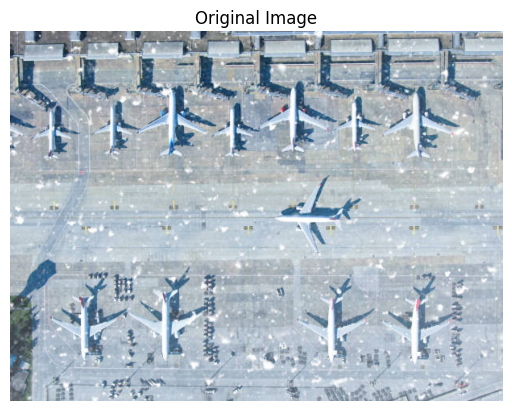

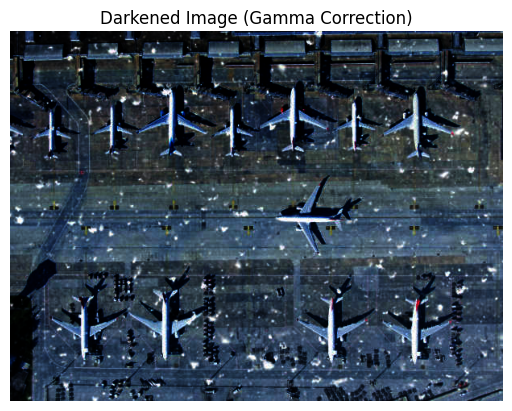

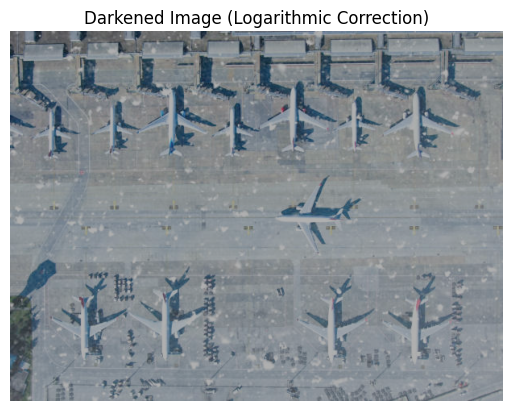

In [22]:
# Load the image
image_path = '/content/drive/MyDrive/Rayhan/DIP_LAB_FINAL/DIP_Lab_task_04.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Gamma Transformation Function
def gamma_correction(image, gamma, c=1):
    normalized_image = image / 255.0
    corrected_image = c * (normalized_image ** gamma)
    corrected_image = (corrected_image * 255).astype(np.uint8)
    return corrected_image

# Logarithmic Transformation Function
def logarithmic_correction(image, c=1):
    normalized_image = image / 255.0
    rows, cols, channels = image.shape

    log_transformed_image = normalized_image.copy()
    for row in range(rows):
        for col in range(cols):
            for channel in range(channels):
                log_transformed_image[row, col, channel] = min(1.0, c * np.log1p(log_transformed_image[row, col, channel]))

    log_transformed_image = (log_transformed_image * 255).astype(np.uint8)
    return log_transformed_image

# Display the original image
plt.imshow(original_image)
plt.axis('off')
plt.title('Original Image')
plt.show()

# Apply gamma transformation
gamma_darkened_image = gamma_correction(original_image, gamma=5)
plt.imshow(gamma_darkened_image)
plt.axis('off')
plt.title('Darkened Image (Gamma Correction)')
plt.show()

# Apply logarithmic transformation
log_darkened_image = logarithmic_correction(original_image, c=1)
plt.imshow(log_darkened_image)
plt.axis('off')
plt.title('Darkened Image (Logarithmic Correction)')
plt.show()


**Task:5**

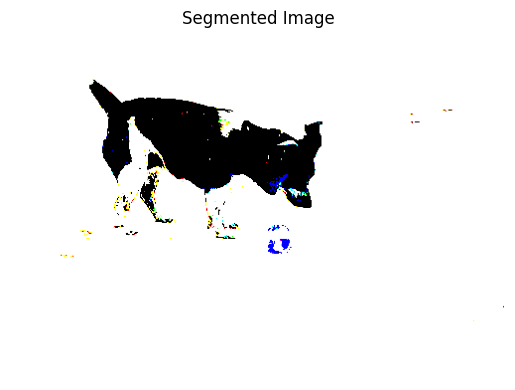

In [23]:
# Load the image
image_path = '/content/drive/MyDrive/Rayhan/DIP_LAB_FINAL/DIP_Lab_task_05.jpg'
input_image = cv2.imread(image_path)

# Threshold value for segmentation
threshold_value = 127

# Get image dimensions
image_height, image_width, num_channels = input_image.shape

# Perform segmentation
segmented_image = input_image.copy()
for row in range(image_height):
    for col in range(image_width):
        for channel in range(num_channels):
            if segmented_image[row, col, channel] > threshold_value:
                segmented_image[row, col, channel] = 255
            else:
                segmented_image[row, col, channel] = 0

# Display the segmented image
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')
plt.title('Segmented Image')
plt.show()
